<a href="https://colab.research.google.com/github/Polyakri/projects/blob/main/MachineLearningProjects/Knn/Ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ex-3
Polydoros Akritidis

#Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
import umap


#Importing the dataset

In [ ]:
df = pd.read_csv("wine_quality.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,rose,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,red,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,red,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,red,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6482,rose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6483,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6484,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6485,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Clearing the dataset

As we can see there are some NaN elements. Let's see how many there are and see if we can drop

In [ ]:
nan_row_count = df.isnull().sum(axis=1)
nan_rows = df[nan_row_count > 0]

print(f"Number of rows with NaN values: {len(nan_rows)}")


num_duplicates = df.duplicated().sum()

print("Number of duplicates:", num_duplicates)

Number of rows with NaN values: 24
Number of duplicates: 1100


We can see that only a few rows have NaN data so we can safely drop them. We also see that there are many duplicates, but there is no need to drop them

In [ ]:
df = df.dropna()
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,rose,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,red,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,red,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,red,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
6459,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
6460,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
6461,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


We also need to drop quality from the dataset because it does not contribute to the model

In [ ]:
df.drop(columns=['quality'], inplace = True)
df

<ipython-input-349-9ca16b22b591>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['quality'], inplace = True)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,red,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,rose,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,red,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,red,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,red,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6458,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6459,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6460,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6461,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


#Dataset Summary

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


#Splitting the data into features and target & train and test set

Splitting into features and targets

In [ ]:
target_column = "type"
y = df[target_column].to_numpy()

dataset_rows = y.shape[0]

fn= df.drop(columns=target_column)
feature_names=fn.columns
x = df.drop(columns= target_column).to_numpy()

Splitting into test set and train set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#Creating the K-NN model

In [ ]:
k_values = [5,15,round(math.sqrt(dataset_rows)),100]
weight_values = ['uniform', 'distance']
p_values = [1,2]

results_df = pd.DataFrame(columns=['k', 'weights', 'p', 'Accuracy'])

for k in k_values:
    for weight in weight_values:
        for p_value in p_values:
            knn = KNeighborsClassifier(n_neighbors=k, weights=weight, p=p_value)
            knn.fit(x_train, y_train)
            y_pred = knn.predict (x_test)
            accuracy = accuracy_score (y_test, y_pred)

            temp_df = pd.DataFrame({'k': [k], 'weights': [weight], 'p': [p_value],
                                    'Accuracy': [accuracy]
                                    })

            # Concatenate the temporary DataFrame to the results DataFrame
            results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df

,k,weights,p,Accuracy
0,5,uniform,1,0.700361
1,5,uniform,2,0.673027
2,5,distance,1,0.734915
3,5,distance,2,0.720474
4,15,uniform,1,0.704487
5,15,uniform,2,0.699845
6,15,distance,1,0.743167
7,15,distance,2,0.738525
8,80,uniform,1,0.710160
9,80,uniform,2,0.696235


There are values that take bigger values than others and since the algorithm calculates distance between points then these values will play a more crucial role than some others. For example the mean total sulfur dioxide is 110 and the mean chlorides is 0.056. This means that the total sulfur dioxide will have higher impact, when in the meanwhile the chlorides impact will be approximately 0.

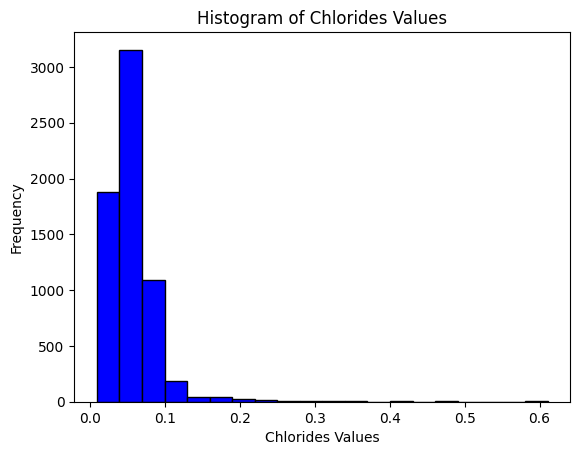

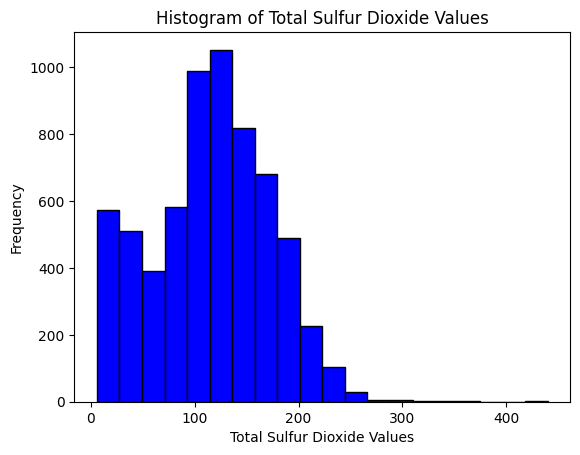

In [ ]:
plt.hist(df['chlorides'], bins=20, color='blue', edgecolor='black')

plt.xlabel('Chlorides Values')
plt.ylabel('Frequency')
plt.title('Histogram of Chlorides Values')

plt.show()


plt.hist(df['total sulfur dioxide'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Total Sulfur Dioxide Values')
plt.ylabel('Frequency')
plt.title('Histogram of Total Sulfur Dioxide Values')

plt.show()

As we can see the difference in the value of these two is huge.

#Testing the dataset with a Decision Tree

We will check the accuracy of a decision Tree with the default arguments

In [ ]:
tree_classifier = DecisionTreeClassifier(random_state = 0)

tree_classifier.fit(x_train, y_train)

y_pred = tree_classifier.predict (x_test)

tree_accuracy = accuracy_score (y_pred, y_test)

tree_accuracy


0.7550283651366684

As we can see it is higher than the accuracy of the Knn algorithm.

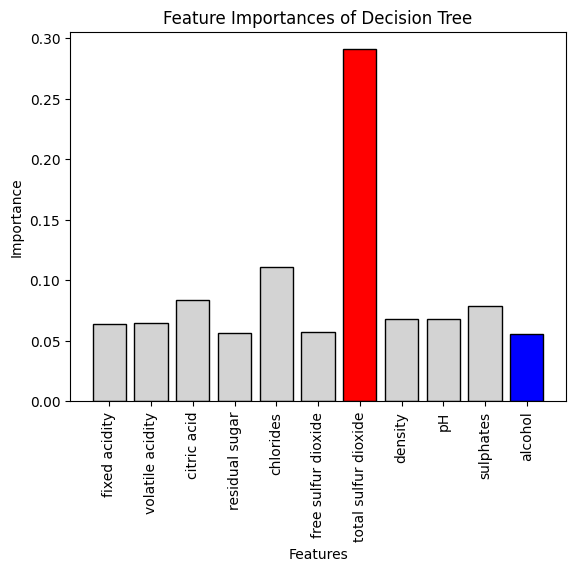

Red= Most Important, Blue= Least Important


In [ ]:
importances_tree = tree_classifier.feature_importances_

sorted_indices = np.argsort(importances_tree)

# Assign colors based on importance
colors = ['lightgray'] * len(feature_names)
colors[sorted_indices[-1]] = 'red'  # Set the color of the most important feature to red
colors[sorted_indices[0]] = 'blue'

plt.bar(feature_names, importances_tree, color=colors, edgecolor='black')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances of Decision Tree')

plt.xticks(rotation=90)

plt.show()

print ("Red= Most Important, Blue= Least Important")



Remove the alcohol parameter and try again for the best knn accuracy algorithm



In [ ]:
# Drop the last column aka Alcohol
x_train_new = x_train[:, :-1]
x_test_new = x_test [:, :-1]


Take the best values from previous KNN

In [ ]:
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
best_result = results_df_sorted.head(1)
print(best_result)

best_k = int(best_result['k'].values[0])
best_weight = best_result['weights'].values[0]
best_p = int(best_result['p'].values[0])





     k   weights  p  Accuracy
10  80  distance  1  0.749355


Train the model with the best accuracy parameters

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weight, p=best_p)

best_knn.fit(x_train_new, y_train)

y_pred_new = best_knn.predict (x_test_new)

accuracy_best_knn_new = accuracy_score (y_test, y_pred_new)

print (accuracy_best_knn_new)

0.738009283135637


As we can see we lost a little accuracy about 1%

#Check the correlation of the dataset

Print the plot of the correlations

<ipython-input-360-a1d1fa50501a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


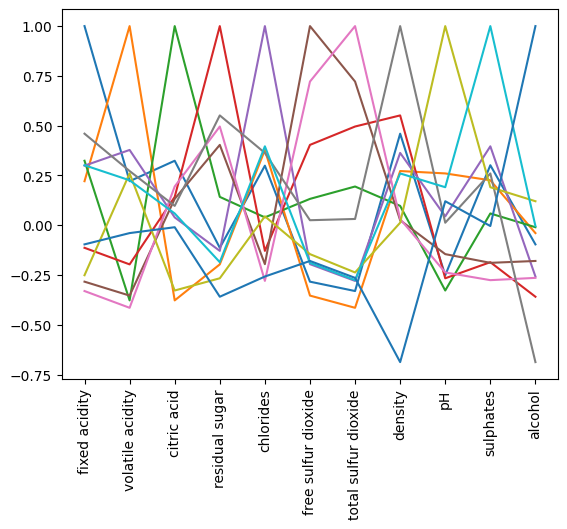

In [ ]:
matrix = df.corr()

plt.xticks(rotation=90)
plt.plot(matrix)
plt.show ()


Print the heatmap

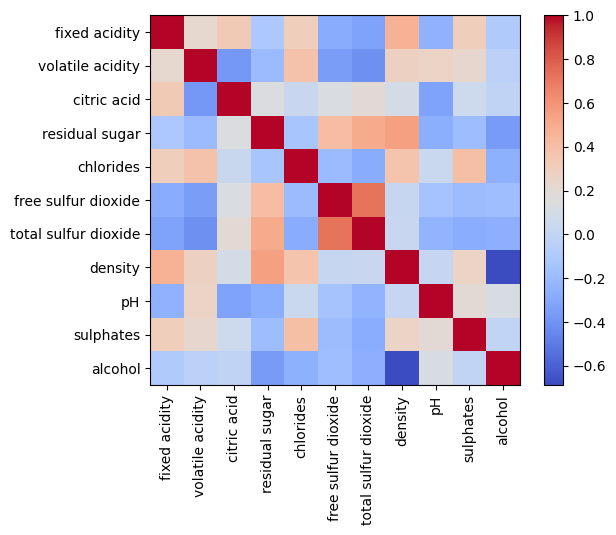

In [ ]:
plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')

plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=90)
plt.yticks(range(len(matrix.columns)), matrix.columns)
# Show colorbar
plt.colorbar()
plt.show ()




#Try again with Normalization on the data

Without normalization, certain features can influence the distance calculation in KNN, leading to biased results as features with larger scales carry more weight in the similarity measurement. That is why we will normalize the data

With MinMaxScaler

In [ ]:
scaler = MinMaxScaler ()

combined_array = np.vstack((x_train, x_test))

scaler.fit(combined_array)

scaler.fit(combined_array)

# Transform the combined data
combined_array_scaled = scaler.transform(combined_array)

# Split arrays back
split_index = len(x_train)
x_train_scaled = combined_array_scaled[:split_index, :]
x_test_scaled = combined_array_scaled[split_index:, :]

Train the Knn algorithm again for every possible parameter

In [ ]:
results_df_scaled = pd.DataFrame(columns=['k', 'weights', 'p', 'Accuracy'])

for k in k_values:
    for weight in weight_values:
        for p_value in p_values:
            knn = KNeighborsClassifier(n_neighbors=k, weights=weight, p=p_value)
            knn.fit(x_train_scaled, y_train)
            y_pred = knn.predict (x_test_scaled)
            accuracy = accuracy_score (y_test, y_pred)

            temp_df = pd.DataFrame({'k': [k], 'weights': [weight], 'p': [p_value],
                                    'Accuracy': [accuracy]
                                    })

            # Concatenate the temporary DataFrame to the results DataFrame
            results_df_scaled = pd.concat([results_df, temp_df], ignore_index=True)

results_df_scaled

,k,weights,p,Accuracy
0,5,uniform,1,0.700361
1,5,uniform,2,0.673027
2,5,distance,1,0.734915
3,5,distance,2,0.720474
4,15,uniform,1,0.704487
5,15,uniform,2,0.699845
6,15,distance,1,0.743167
7,15,distance,2,0.738525
8,80,uniform,1,0.710160
9,80,uniform,2,0.696235


#Use OneHotEncoder

In [ ]:
dummies = pd.get_dummies(df['type'])
res = pd.concat([df, dummies], axis=1)
df_new = res.drop(columns=['type'])


In [ ]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,rose,white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,0,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,0,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,0,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1,0,0
6459,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0,0
6460,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,0,0
6461,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0,0


Again let's split the data once more in targets and features and to test and train set


In [ ]:
target_column = ["red", "white", "rose"]
y = df_new[target_column].to_numpy()

dataset_rows = y.shape[0]

fn= df_new.drop(columns=target_column)
feature_names=fn.columns
x = df_new.drop(columns= target_column).to_numpy()

In [ ]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.3, random_state=0)

Let's try the KNN with OneHotEncoded Data

In [ ]:
results_df_new = pd.DataFrame(columns=['k', 'weights', 'p', 'Accuracy', 'MAE'])

for k in k_values:
    for weight in weight_values:
        for p_value in p_values:
            knn = KNeighborsClassifier(n_neighbors=k, weights=weight, p=p_value)
            knn.fit(x_train_new, y_train_new)
            y_pred_new = knn.predict (x_test_new)
            accuracy = accuracy_score (y_test_new, y_pred_new)
            mae = mean_absolute_error(y_test_new, y_pred_new)

            temp_df = pd.DataFrame({'k': [k], 'weights': [weight], 'p': [p_value],
                                    'Accuracy': [accuracy], 'MAE': [mae]
                                    })

            # Concatenate the temporary DataFrame to the results DataFrame
            results_df_new = pd.concat([results_df_new, temp_df], ignore_index=True)

results_df_new

,k,weights,p,Accuracy,MAE
0,5,uniform,1,0.678700,27.392470
1,5,uniform,2,0.647757,30.029912
2,5,distance,1,0.709128,24.801616
3,5,distance,2,0.690562,26.383531
4,15,uniform,1,0.664776,28.574351
5,15,uniform,2,0.661681,28.840124
6,15,distance,1,0.712739,24.489084
7,15,distance,2,0.706034,25.060684
8,80,uniform,1,0.676637,27.571429
9,80,uniform,2,0.664776,28.582087


#BONUS - Reducing Dimensions with LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit (x_train, y_train)
x_train_lda = lda.transform (x_train)
x_test_lda = lda.transform (x_test)

Scatter Plot with 2 Dimensions with LDA

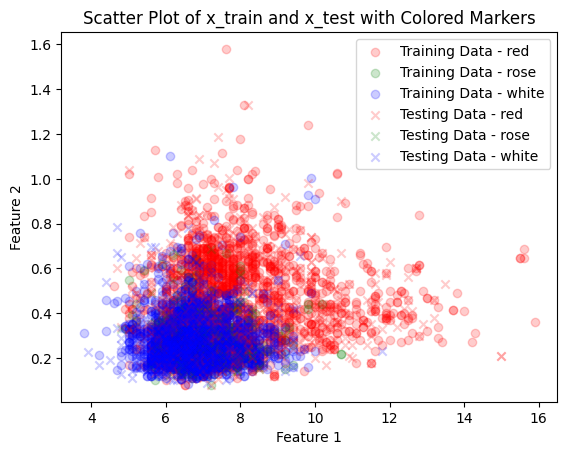

In [ ]:
# Create a dictionary to map classes to colors
color_mapping = {"red": "red", "rose": "green", "white": "blue"}

# Scatter plot for x_train
for label, color in color_mapping.items():
    indices = (y_train == label)
    plt.scatter(x_train[indices, 0], x_train[indices, 1], label=f'Training Data - {label}', marker='o', color=color, alpha = 0.2)

# Scatter plot for x_test
for label, color in color_mapping.items():
    indices = (y_test == label)
    plt.scatter(x_test[indices, 0], x_test[indices, 1], label=f'Testing Data - {label}', marker='x', color=color, alpha = 0.2)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of x_train and x_test with Colored Markers')
plt.legend()

# Show the plot
plt.show()

Let's try a default KNN in order to see the accuracy of the new LDA data

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_lda, y_train)
y_pred_lda = knn.predict (x_test_lda)
accuracy = accuracy_score (y_test, y_pred_lda)
accuracy

0.7168643630737493

#BONUS - Reduce Dimensions with UMAP

In [ ]:
umap_model = umap.UMAP(n_components=2)

umap_train = umap_model.fit_transform(x_train)
umap_test = umap_model.transform(x_test)

Scatter Plot with 2 Dimensions with UMAP

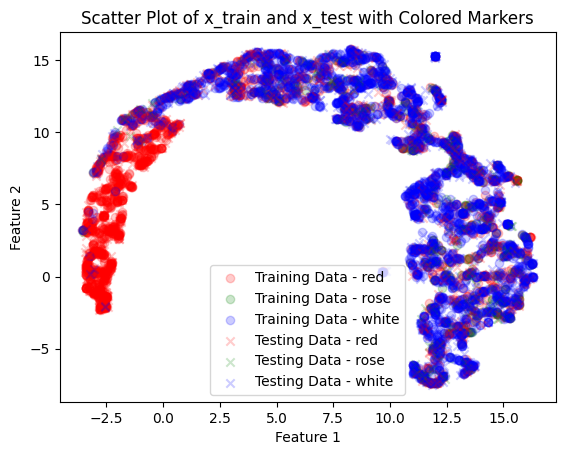

In [ ]:
# Scatter plot for x_train
for label, color in color_mapping.items():
    indices = (y_train == label)
    plt.scatter(umap_train[indices, 0], umap_train[indices, 1], label=f'Training Data - {label}', marker='o', color=color, alpha = 0.2)

# Scatter plot for x_test
for label, color in color_mapping.items():
    indices = (y_test == label)
    plt.scatter(umap_test[indices, 0], umap_test[indices, 1], label=f'Testing Data - {label}', marker='x', color=color, alpha = 0.2)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of x_train and x_test with Colored Markers')
plt.legend()


plt.show()

Let's try a default KNN in order to see the accuracy of the new UMAP data

In [ ]:
knn = KNeighborsClassifier()
knn.fit(umap_train, y_train)
umap_pred = knn.predict (umap_test)
accuracy = accuracy_score (y_test, umap_pred)
accuracy

0.6616812790097989

As we can see the LDA algorith reduces the dimensions and provides better accuracy (at least for the KNN algorithm) than the UMAP.